In [14]:
# 1. Gerekli Kütüphaneleri Yükleyelim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import time


In [15]:
# 2. Veriyi Yükleyelim
# Kaggle'dan indirilen diabetes.csv dosyasını yükleyelim

df = pd.read_csv('diabetes.csv')

# Verinin ilk 5 satırını inceleyelim
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
# 3. Veri Ön İşleme
# Eksik verileri kontrol edelim
df.isnull().sum()

# Özellikler (X) ve hedef değişkeni (y) ayıralım
X = df.drop(columns='Outcome')  # Özellikler (features)
y = df['Outcome']  # Hedef değişken (target)

# Veri setinin sınıf dağılımını inceleyelim
y.value_counts()


Outcome
0    500
1    268
Name: count, dtype: int64

In [17]:
# 4. Eğitim ve Test Verisine Ayırma
# Veriyi eğitim ve test setlerine ayıralım (test oranı %30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Özellikleri standardize edelim (veriyi ölçeklendirelim)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
# 5. Logistic Regression Modeli Eğitimi
# Logistic Regression modelini oluşturup eğitelim
logreg = LogisticRegression(max_iter=1000)

# Eğitim süresi ölçelim
start_time = time.time()
logreg.fit(X_train_scaled, y_train)
end_time = time.time()

# Eğitim süresi
training_time = end_time - start_time
print(f"Model eğitimi süresi: {training_time:.4f} saniye")


Model eğitimi süresi: 0.0030 saniye


In [19]:
# 6. Model ile Tahmin Yapma
# Test verisi üzerinde tahmin yapalım
y_pred = logreg.predict(X_test_scaled)

# Tahmin süresi
prediction_time = time.time() - end_time
print(f"Model tahmin süresi: {prediction_time:.4f} saniye")


Model tahmin süresi: 9.9860 saniye


In [12]:
# Test seti üzerinde tahmin yap
start_time = time.time()

y_pred = model.predict(X_test)

# Test süresi hesapla
test_time = time.time() - start_time
print(f"Test süresi: {test_time:.4f} saniye")


Test süresi: 0.0020 saniye


In [20]:
# 7. Model Performansını Değerlendirme
# Karmaşıklık Matrisi (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)
print("Karmaşıklık Matrisi:")
print(cm)

# Sınıflandırma Raporu (Classification Report)
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

# Modelin doğruluğu (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model doğruluğu: {accuracy:.4f}")


Karmaşıklık Matrisi:
[[120  31]
 [ 30  50]]
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

Model doğruluğu: 0.7359


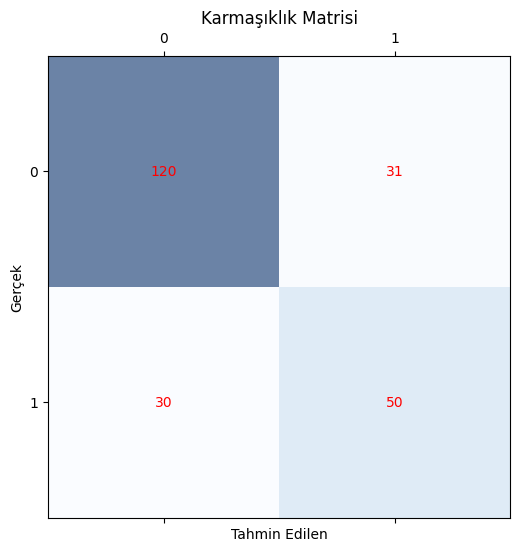

In [21]:
# 8. Karmaşıklık Matrisi Görselleştirmesi
# Karmaşıklık matrisini görselleştirelim
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap='Blues', alpha=0.6)
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, f'{val}', ha='center', va='center', color='red')

plt.title('Karmaşıklık Matrisi')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()
